In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn import under_sampling
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
train_data=pd.read_csv('train.csv')

In [4]:
train_data.columns

Index(['Complaint-ID', 'Date-received', 'Transaction-Type', 'Complaint-reason',
       'Company-response', 'Date-sent-to-company', 'Complaint-Status',
       'Consumer-disputes', 'Consumer-complaint-summary'],
      dtype='object')

In [5]:
test_data=pd.read_csv('test.csv')
for c in test_data.columns:
    if(test_data[c].dtype==object and c!='Complaint-ID' and c!='Date-received' and c!='Date-sent-to-company'):
        le=LabelEncoder()
        le.fit(train_data[c].astype(str))
        train_data[c]=le.transform(train_data[c].astype(str))
        test_data[c] = test_data[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>')
        test_data[c]=le.transform(test_data[c].astype(str))
       

In [6]:
train_data['Complaint-Status']=train_data['Complaint-Status'].astype('category')
train_data['Complaint-Status']=train_data['Complaint-Status'].cat.codes

In [7]:
train_data.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,10,78,10,11/11/2015,1,1,32712
1,Tr-2,7/7/2015,5,71,7,7/7/2015,3,0,39918
2,Tr-3,5/7/2015,0,145,10,5/7/2015,1,0,5429
3,Tr-4,11/12/2016,7,36,4,11/12/2016,1,0,35360
4,Tr-5,9/29/2016,3,100,9,9/29/2016,1,0,22874


In [8]:
train_data['Date-received']=pd.to_datetime(train_data['Date-received'])

train_data['Year']=train_data['Date-received'].dt.year

train_data['Month']=train_data['Date-received'].dt.month

train_data['day']=train_data['Date-received'].dt.day

In [9]:
test_data['Date-received']=pd.to_datetime(test_data['Date-received'])

test_data['Year']=test_data['Date-received'].dt.year

test_data['Month']=test_data['Date-received'].dt.month

test_data['day']=test_data['Date-received'].dt.day


In [10]:
test_data.head(11)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary,Year,Month,day
0,Te-1,2016-08-18,0,1,9,8/18/2016,0,43022,2016,8,18
1,Te-2,2016-04-18,7,33,4,4/20/2016,0,43022,2016,4,18
2,Te-3,2016-03-23,5,71,11,3/23/2016,0,43022,2016,3,23
3,Te-4,2017-06-26,15,49,11,6/26/2017,3,43022,2017,6,26
4,Te-5,2016-05-13,5,71,9,5/13/2016,0,43022,2016,5,13
5,Te-6,2016-05-25,0,1,9,5/25/2016,0,43022,2016,5,25
6,Te-7,2015-08-22,2,130,4,8/22/2015,0,43022,2015,8,22
7,Te-8,2017-03-27,5,71,11,3/27/2017,1,43022,2017,3,27
8,Te-9,2017-07-12,4,137,11,7/12/2017,3,18783,2017,7,12
9,Te-10,2017-06-19,4,105,9,6/19/2017,3,43022,2017,6,19


In [11]:
train_data['Complaint-Status'].value_counts()

1    34300
3     5018
2     2818
0      809
4      321
Name: Complaint-Status, dtype: int64

In [12]:
target=train_data['Complaint-Status']
t_data,d_data,t_label,d_label=train_test_split(train_data,target,test_size=0.10)

# Classifying the data hirarcilly

In [13]:
train_data=train_data.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary'],1)

In [14]:
train_data['Complaint-Status'].value_counts()

1    34300
3     5018
2     2818
0      809
4      321
Name: Complaint-Status, dtype: int64

In [15]:
train_data['status']=train_data['Complaint-Status'].apply(lambda x: 1 if x==1 else 0)

In [16]:
train_data2=train_data[train_data['Complaint-Status']!=1]

In [17]:
label=train_data['status']

In [18]:
train_data.columns

Index(['Transaction-Type', 'Complaint-reason', 'Company-response',
       'Complaint-Status', 'Consumer-disputes', 'Year', 'Month', 'day',
       'status'],
      dtype='object')

In [19]:
train_data['status'].value_counts()

1    34300
0     8966
Name: status, dtype: int64

In [20]:
required_columns=[u'Transaction-Type', u'Complaint-reason', u'Company-response',
         u'Consumer-disputes', u'Year', u'Month', u'day']

In [21]:
label=train_data['status']

In [22]:
model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05,scale_pos_weight=0.8,min_child_weight=1)
model.fit(train_data[required_columns],label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=0.8, seed=None,
       silent=True, subsample=1)

In [23]:
train_data2.shape

(8966, 9)

In [24]:
train_data2=train_data2.drop(['status'],1)
train_data2['status']=train_data2['Complaint-Status'].apply(lambda x:1 if x==3 else 0)

In [25]:
label=train_data2['status']
model2=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05,scale_pos_weight=0.8,min_child_weight=1)
model2.fit(train_data2[required_columns],label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=0.8, seed=None,
       silent=True, subsample=1)

In [26]:
train_data3=train_data2[train_data2['status']!=1]

In [27]:
train_data3.shape

(3948, 9)

In [28]:
train_data3['Complaint-Status'].value_counts()

2    2818
0     809
4     321
Name: Complaint-Status, dtype: int64

In [29]:
train_data3=train_data2[train_data2['status']!=1]
train_data3=train_data3.drop(['status'],1)
train_data3['status']=train_data3['Complaint-Status'].apply(lambda x:1 if x==2 else 0)

In [30]:
train_data3['status'].value_counts()

1    2818
0    1130
Name: status, dtype: int64

# Plotting 

In [31]:
train_data3.columns

Index(['Transaction-Type', 'Complaint-reason', 'Company-response',
       'Complaint-Status', 'Consumer-disputes', 'Year', 'Month', 'day',
       'status'],
      dtype='object')

In [32]:
import matplotlib.pyplot as plt


In [34]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.pairplot(train_data3, 
             vars = ['Transaction-Type','Complaint-reason','Company-response'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Title 
plt.suptitle('Brain-waves', 
             size = 28);

plt.show()

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


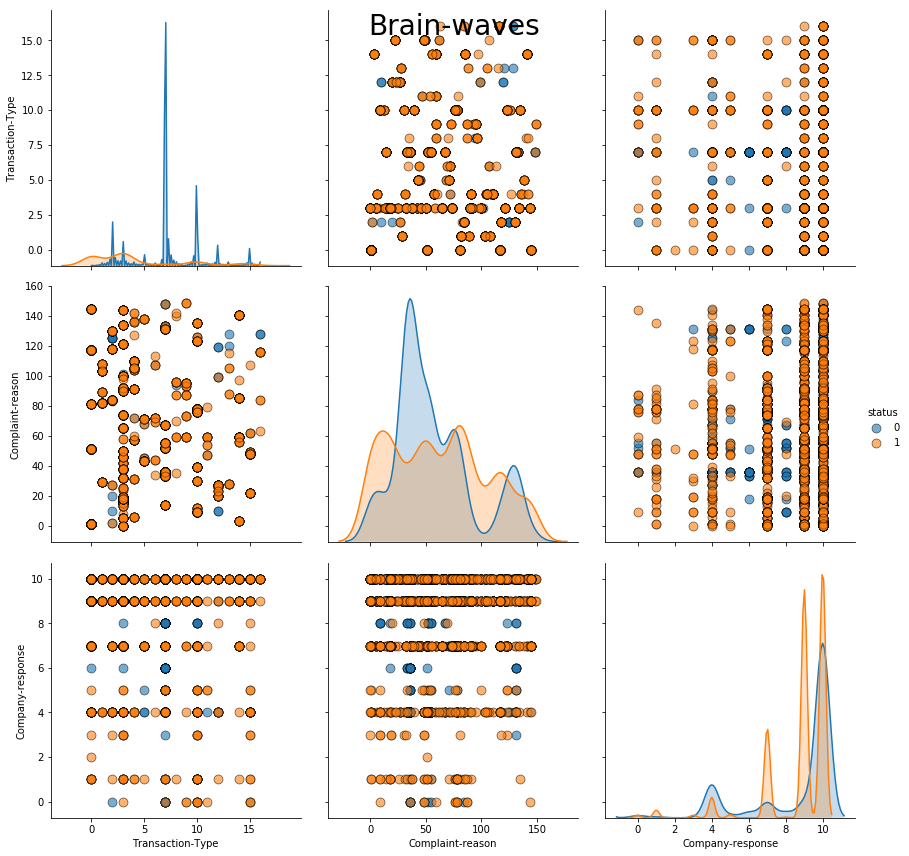

In [35]:
sns.pairplot(train_data3, 
             vars = ['Transaction-Type','Complaint-reason','Company-response'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Title 
plt.suptitle('Brain-waves', 
             size = 28);

plt.show()

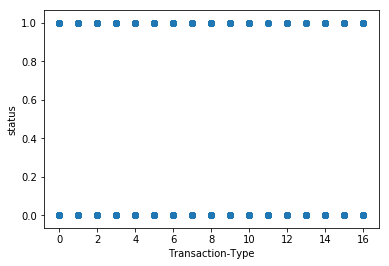

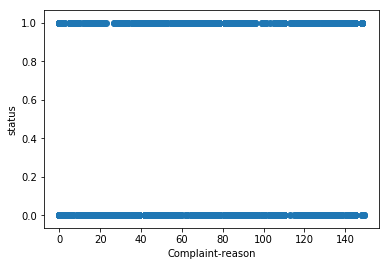

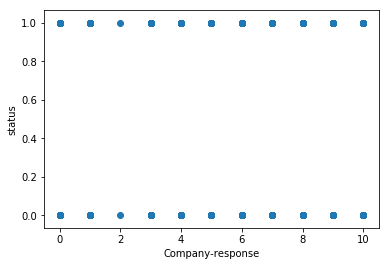

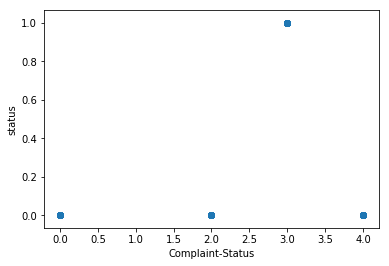

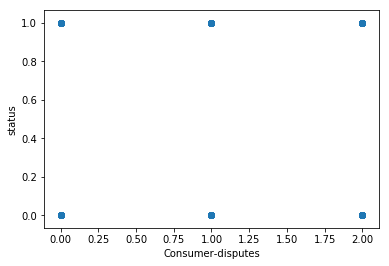

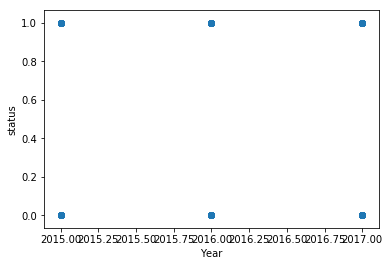

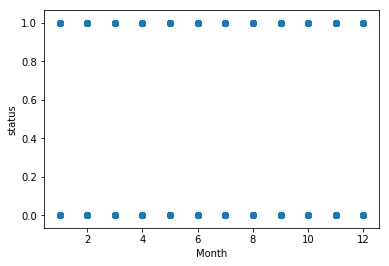

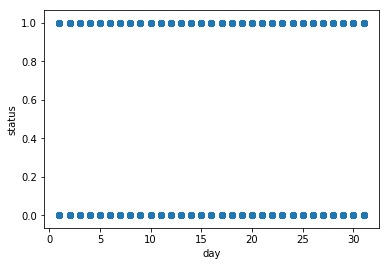

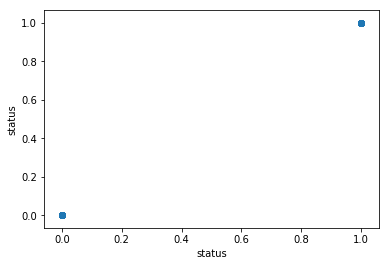

In [36]:
for c in train_data2:
    plt.scatter(train_data2[c],train_data2['status'])
    plt.xlabel(c)
    plt.ylabel('status')
    plt.show()

In [37]:
train_data['day'].value_counts()

8     1570
19    1560
20    1541
9     1534
28    1525
21    1505
17    1471
15    1461
6     1460
23    1435
27    1434
14    1423
22    1412
7     1395
11    1392
18    1390
16    1384
10    1376
26    1374
4     1373
13    1371
2     1368
25    1366
1     1363
5     1362
24    1360
12    1352
3     1347
29    1305
30    1211
31     846
Name: day, dtype: int64

# Undersampling 

In [38]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
#X_tl, y_tl, id_tl = tl.fit_sample(X, y)

In [39]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)

In [40]:
train_data3['status'].value_counts()

1    2818
0    1130
Name: status, dtype: int64

In [41]:
label=train_data3['status']
train_data3_t, label_t, id_tl = rus.fit_sample(train_data3,label)

In [42]:
train_data3_t=pd.DataFrame(train_data3_t)
train_data3_t.columns=train_data3.columns

In [43]:
train_data3_t.shape

(2260, 9)

In [44]:
required_columns

['Transaction-Type',
 'Complaint-reason',
 'Company-response',
 'Consumer-disputes',
 'Year',
 'Month',
 'day']

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


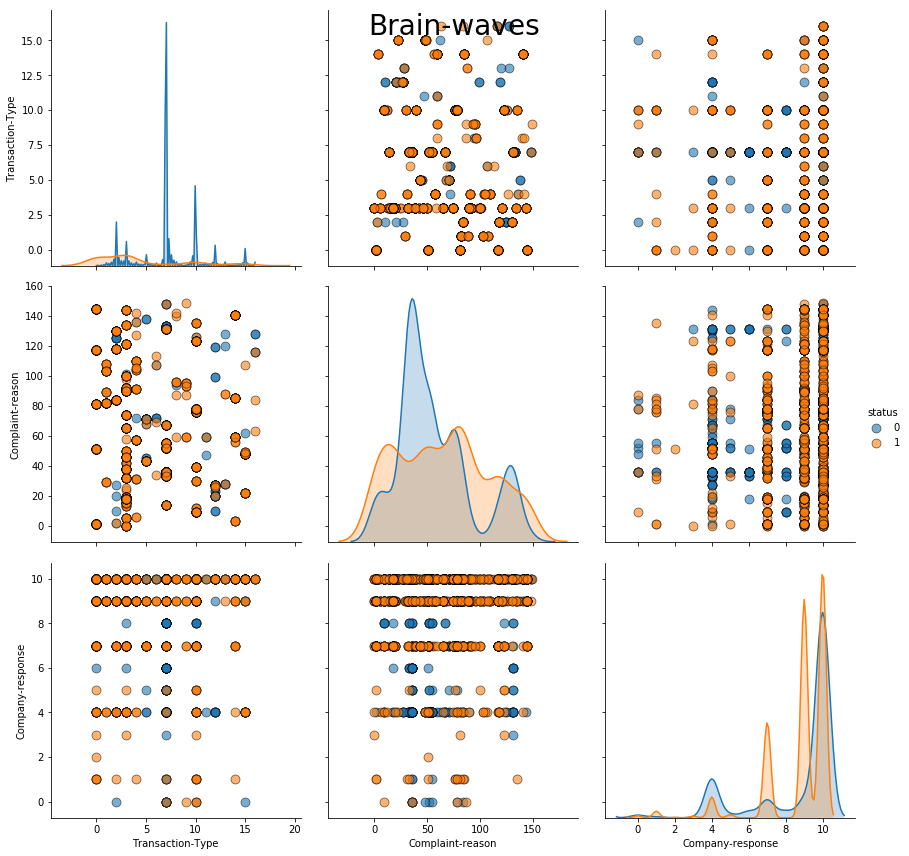

In [45]:
sns.pairplot(train_data3_t, 
             vars = ['Transaction-Type','Complaint-reason','Company-response'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Title 
plt.suptitle('Brain-waves', 
             size = 28);

plt.show()

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


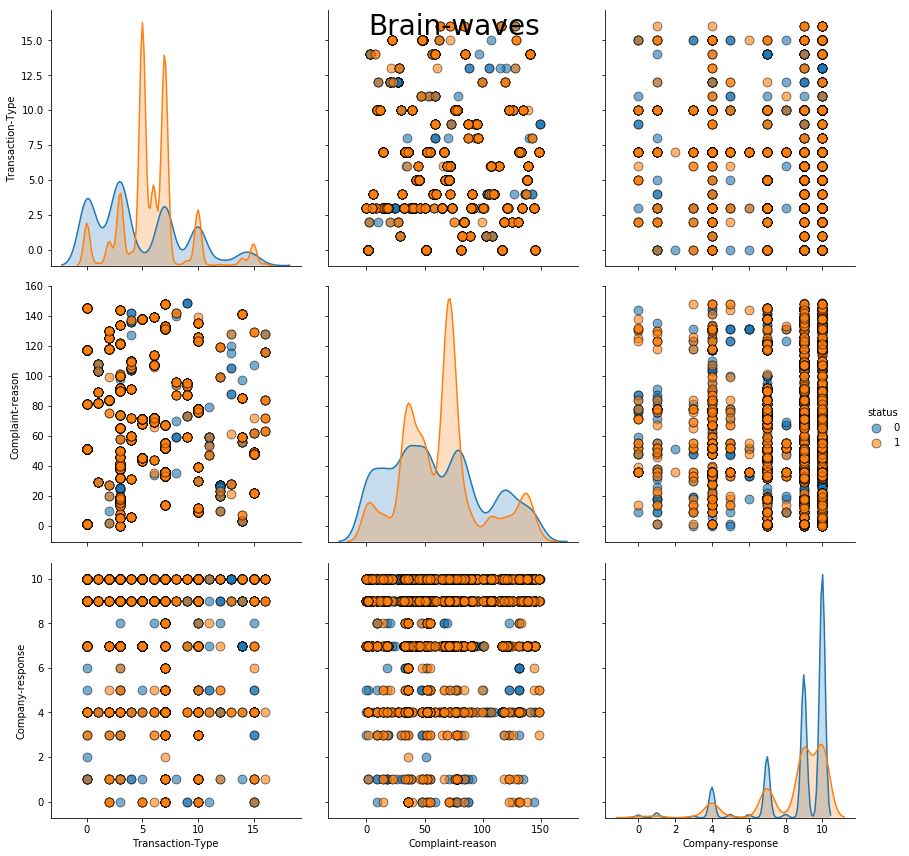

In [46]:
sns.pairplot(train_data2, 
             vars = ['Transaction-Type','Complaint-reason','Company-response'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Title 
plt.suptitle('Brain-waves', 
             size = 28);

plt.show()

In [47]:
col_3=['Complaint-reason','Company-response']

In [48]:
model3=xgb.XGBClassifier(max_depth=10, n_estimators=300,subsample=0.7, learning_rate=0.05,scale_pos_weight=1,min_child_weight=1)
model3.fit(train_data3_t[col_3],label_t)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

In [49]:
train_data4=train_data3[train_data3['status']!=1]

In [50]:
train_data4.shape

(1130, 9)

In [51]:
train_data4=train_data3[train_data3['status']!=1]t
rain_data4=train_data4.drop(['status'],1)
train_data4['status']=train_data4['Complaint-Status'].apply(lambda x: 1 if x==0 else 0)

In [52]:
train_data4['status'].value_counts()

1    809
0    321
Name: status, dtype: int64

In [122]:
label=train_data4['status']
model4=xgb.XGBClassifier(max_depth=3, n_estimators=300,subsample=0.7, learning_rate=0.05,scale_pos_weight=0.8,min_child_weight=1)
model4.fit(train_data4[col_3],label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=0.8, seed=None,
       silent=True, subsample=0.7)

# calculating the result on the validation set

In [54]:
d_data.shape

(4327, 12)

In [55]:
d_data=d_data[required_columns]

In [56]:
d_data['status']=model.predict(d_data)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [227]:
d_data_ans=d_data[d_data['status']==1]

In [228]:
d_data2=d_data[d_data['status']==0]

In [229]:
d_data2.shape

(183, 8)

In [230]:
d_data2=d_data2.drop(['status'],1)
d_data2['status']=model2.predict(d_data2)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [231]:
d_data2['status'].value_counts()
d_data2['status']=d_data2['status'].apply(lambda x: 3 if x==1 else 0)

In [232]:
d_data2['status'].value_counts()

0    144
3     39
Name: status, dtype: int64

In [233]:
d_data_ans2=d_data2[d_data2['status']==3]

In [234]:
d_data_ans2.shape

(39, 8)

In [235]:
d_data3=d_data2[d_data2['status']==0]

In [236]:
d_data3.shape

(144, 8)

In [239]:
#d_data3=d_data3.drop(['status'],1)
d_data3['status']=model3.predict(d_data3[col_3])

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [240]:
d_data3['status'].value_counts()

1    144
Name: status, dtype: int64

In [151]:
d_data3['status']=d_data3['status'].apply(lambda x: 2 if x==1 else 0)

In [152]:
d_data=pd.concat([d_data_ans,d_data_ans2,d_data3],0)

In [153]:
d_data.shape

(4327, 8)

In [154]:
d_data['status'].value_counts()

1    4144
2     143
3      39
0       1
Name: status, dtype: int64

In [155]:
from sklearn.metrics import f1_score
f1_score(d_data['status'],d_label,average='weighted')

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.8336559183189134

# Testing 

In [57]:
test_data.shape

(18543, 11)

In [58]:
test_data.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary,Year,Month,day
0,Te-1,2016-08-18,0,1,9,8/18/2016,0,241,2016,8,18
1,Te-2,2016-04-18,7,33,4,4/20/2016,0,241,2016,4,18
2,Te-3,2016-03-23,5,71,0,3/23/2016,0,241,2016,3,23
3,Te-4,2017-06-26,15,49,0,6/26/2017,0,241,2017,6,26
4,Te-5,2016-05-13,5,71,9,5/13/2016,0,241,2016,5,13


In [59]:
required_columns.append('Complaint-ID')
test_data=test_data[required_columns]

In [60]:
test_data=test_data[required_columns]

In [61]:
test_data.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,Year,Month,day,Complaint-ID
0,0,1,9,0,2016,8,18,Te-1
1,7,33,4,0,2016,4,18,Te-2
2,5,71,0,0,2016,3,23,Te-3
3,15,49,0,0,2017,6,26,Te-4
4,5,71,9,0,2016,5,13,Te-5


In [62]:
sub=pd.DataFrame()

In [63]:
sub['Complaint-ID']=test_data['Complaint-ID']

In [65]:
required_columns2=required_columns[:-1]

In [66]:
required_columns2

['Transaction-Type',
 'Complaint-reason',
 'Company-response',
 'Consumer-disputes',
 'Year',
 'Month',
 'day']

In [67]:
#test_data=test_data.drop(['status'],1)
test_data['status']=model.predict(test_data[required_columns2])

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
test_data['status'].value_counts()

1    17547
0      996
Name: status, dtype: int64

In [69]:
test_data_ans=test_data[test_data['status']==1]

In [70]:
test_data2=test_data[test_data['status']==0]

In [71]:
test_data['status'].value_counts()

1    17547
0      996
Name: status, dtype: int64

In [72]:
test_data2.shape

(996, 9)

In [73]:
test_data2=test_data2.drop(['status'],1)

In [74]:
test_data2['status']=model2.predict(test_data2[required_columns2])

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
test_data2['status'].value_counts()

0    777
1    219
Name: status, dtype: int64

In [76]:
test_data2['status']=test_data2['status'].apply(lambda x: 3 if x==1 else 0)

In [77]:
test_data_ans2=test_data2[test_data2['status']==3]

In [78]:
test_data3=test_data2[test_data2['status']==0]

In [79]:
test_data3.shape

(777, 9)

In [80]:
test_data3=test_data3.drop(['status'],1)

In [81]:
test_data3=test_data3.drop(['status'],1)
test_data3['status']=model3.predict(test_data3[col_3])

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [82]:
test_data3['status']=test_data3['status'].apply(lambda x: 2 if x==1 else 0)

In [83]:
test_data3['status'].value_counts()

2    708
0     69
Name: status, dtype: int64

In [84]:
train_data3['Complaint-Status'].value_counts()

2    2818
0     809
4     321
Name: Complaint-Status, dtype: int64

In [85]:
train_data3['status'].value_counts()

1    2818
0    1130
Name: status, dtype: int64

In [114]:
test_data3['status'].value_counts()

2    708
0     69
Name: status, dtype: int64

In [115]:
test_data3.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,Year,Month,day,Complaint-ID,status
34,3,90,9,0,2016,4,26,Te-35,2
59,3,18,9,0,2016,5,5,Te-60,2
62,0,117,9,0,2016,12,14,Te-63,2
88,3,46,0,0,2016,10,26,Te-89,2
171,4,110,9,0,2017,6,12,Te-172,2


In [116]:
test_data_ans3=test_data3[test_data3['status']==2]

In [117]:
test_data4=test_data3[test_data3['status']==0]

In [123]:
test_data4=test_data3[test_data3['status']==0]
test_data4=test_data4.drop(['status'],1)
test_data4['status']=model4.predict(test_data4[col_3])

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [124]:
test_data4['status'].value_counts()

1    69
Name: status, dtype: int64

In [89]:
test_data=pd.concat([test_data_ans,test_data_ans2,test_data_ans3],0)

In [90]:
test_data.shape

(18543, 9)

In [91]:
submission_file=pd.read_csv('sample_submission.csv')

In [94]:
test_data['Complaint-ID']=test_data['Com']

KeyError: 'Com'

In [95]:
train_data.head()

,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes,Year,Month,day,status
0,10,78,10,1,1,2015,11,11,1
1,5,71,7,3,0,2015,7,7,0
2,0,145,10,1,0,2015,5,7,1
3,7,36,4,1,0,2016,11,12,1
4,3,100,9,1,0,2016,9,29,1


In [96]:
test_data.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,Year,Month,day,Complaint-ID,status
0,0,1,9,0,2016,8,18,Te-1,1
1,7,33,4,0,2016,4,18,Te-2,1
2,5,71,0,0,2016,3,23,Te-3,1
3,15,49,0,0,2017,6,26,Te-4,1
4,5,71,9,0,2016,5,13,Te-5,1


In [97]:
test_sub=test_data[['Complaint-ID','status']]

In [98]:
test_sub['status'].value_counts()

1    17547
2      708
3      219
0       69
Name: status, dtype: int64

In [99]:
submission_file=pd.merge(test_sub,submission_file,on='Complaint-ID',how='inner')

In [100]:
submission_file['status'].value_counts()

1    9
3    1
Name: status, dtype: int64

In [101]:
test_sub['status'].value_counts()

1    17547
2      708
3      219
0       69
Name: status, dtype: int64

In [102]:
le=LabelEncoder()
train_data_=pd.read_csv('train.csv')
le.fit(train_data_['Complaint-Status'])
test_sub['status']=le.inverse_transform(test_sub['status'])

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [103]:
test_sub['status'].value_counts()

Closed with explanation            17547
Closed with monetary relief          708
Closed with non-monetary relief      219
Closed                                69
Name: status, dtype: int64

In [285]:
test_sub=pd.merge()

(18543, 9)

In [105]:
sub.head(15)

,Complaint-ID
0,Te-1
1,Te-2
2,Te-3
3,Te-4
4,Te-5
5,Te-6
6,Te-7
7,Te-8
8,Te-9
9,Te-10


In [295]:
sub.head(17)

,Complaint-ID,Complaint-Status
0,Te-1,Closed with explanation
1,Te-2,Closed with explanation
2,Te-3,Closed with explanation
3,Te-4,Closed with explanation
4,Te-5,Closed with explanation
5,Te-6,Closed with explanation
6,Te-7,Closed with explanation
7,Te-8,Closed with explanation
8,Te-9,Closed with explanation
9,Te-10,Closed with explanation


In [106]:
sub=pd.merge(sub,test_sub,how='inner',on='Complaint-ID')

In [110]:
sub.columns=['Complaint-ID','Complaint-Status']

In [111]:
sub.columns=['Complaint-ID','Complaint-Status']
sub['Complaint-Status'].value_counts()

Closed with explanation            17547
Closed with monetary relief          708
Closed with non-monetary relief      219
Closed                                69
Name: Complaint-Status, dtype: int64

In [112]:
sub.to_csv('sub11.csv', sep=',',index=False)

In [289]:
sub.columns=['Complaint-ID','Complaint-Status']

In [209]:
submission_file=pd.read_csv('sample_submission.csv')

In [294]:
test_data.shape

(18543, 9)

In [92]:
sub=sub.rename(columns={"status" : "Complaint-Status"})

In [93]:
sub.to_csv('sub7.csv',sep=',',index=False)